# Кузнецов, ПМ21-4, вариант 20

# 1. Познакомьтесь с возможностями библиотеки sklearn по загрузке датасетов из репозитория openml.org

In [104]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Загрузите нужный вам датасет, выведите его основные характеристики: количество строк и столбцов, типы данных, количество значений в каждом столбце, основную статистическую информацию об атрибутах.

In [245]:
df = fetch_openml(name='prnn_crabs')

In [246]:
X = df['data']
y = df['target']

In [247]:
X.head()

,sex,index,FL,RW,CL,CW,BD
0,Male,1.0,8.1,6.7,16.1,19.0,7.0
1,Male,2.0,8.8,7.7,18.1,20.8,7.4
2,Male,3.0,9.2,7.8,19.0,22.4,7.7
3,Male,4.0,9.6,7.9,20.1,23.1,8.2
4,Male,5.0,9.8,8.0,20.3,23.0,8.2


In [248]:
X.shape

(200, 7)

In [249]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     200 non-null    category
 1   index   200 non-null    float64 
 2   FL      200 non-null    float64 
 3   RW      200 non-null    float64 
 4   CL      200 non-null    float64 
 5   CW      200 non-null    float64 
 6   BD      200 non-null    float64 
dtypes: category(1), float64(6)
memory usage: 9.8 KB


In [250]:
X.describe()

,index,FL,RW,CL,CW,BD
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,25.500000,15.583000,12.73850,32.105500,36.414500,14.030500
std,14.467083,3.495325,2.57334,7.118983,7.871955,3.424772
min,1.000000,7.200000,6.50000,14.700000,17.100000,6.100000
25%,13.000000,12.900000,11.00000,27.275000,31.500000,11.400000
50%,25.500000,15.550000,12.80000,32.100000,36.800000,13.900000
75%,38.000000,18.050000,14.30000,37.225000,42.000000,16.600000
max,50.000000,23.100000,20.20000,47.600000,54.600000,21.600000


In [251]:
y.head()

0    blue_form
1    blue_form
2    blue_form
3    blue_form
4    blue_form
Name: sp, dtype: category
Categories (2, object): ['blue_form', 'orange_form']

**В целевой переменной 2 класса $\Rightarrow$ бинарная классификация**

In [252]:
y_int = (y=='orange_form').apply(int)
y_int.sample(10)

146    1
79     0
177    1
163    1
150    1
12     0
58     0
29     0
59     0
171    1
Name: sp, dtype: int64

"1" - 'orange_form'\
"0" - 'blue_form'

# 3. Прочитайте и изложите в работе общее описание датасета. Опишите, решаемую моделированием проблему.

Данные Campbell & Mahon (1974) о морфологии скальных крабов рода Leptograpsus.

Насчитывается по 50 особей каждого пола каждой из двух цветовых форм.

Файл данных crabs.dat содержит строки

sp "species" с кодировкой B (синяя форма) или O (оранжевая форма) индекс пола с кодировкой M или F в каждой группе из 50 FL передняя кромка панциря (мм) RW задняя ширина панциря (мм) CL длина по средней линии панциря (мм) CW максимальная ширина панциря (мм) Глубина корпуса BD (мм)

**Задача:** юинарная классификация крабов.

# 4. Удалите, если нужно, нечисловые колонки в датасете.

In [253]:
from sklearn import preprocessing

**Заменим признак 'sex' на бинарный признак 'is_male', и удалим столбцы 'sex' и 'index'.**

In [254]:
le = preprocessing.LabelEncoder()
X['is_male'] = le.fit_transform(X['sex'])
X.iloc[47:52]

,sex,index,FL,RW,CL,CW,BD,is_male
47,Male,48.0,19.8,14.2,43.2,49.7,18.6,1
48,Male,49.0,19.8,14.3,42.4,48.9,18.3,1
49,Male,50.0,21.3,15.7,47.1,54.6,20.0,1
50,Female,1.0,7.2,6.5,14.7,17.1,6.1,0
51,Female,2.0,9.0,8.5,19.3,22.7,7.7,0


In [255]:
X = X.drop(['sex','index'], axis=1)
X.head()

,FL,RW,CL,CW,BD,is_male
0,8.1,6.7,16.1,19.0,7.0,1
1,8.8,7.7,18.1,20.8,7.4,1
2,9.2,7.8,19.0,22.4,7.7,1
3,9.6,7.9,20.1,23.1,8.2,1
4,9.8,8.0,20.3,23.0,8.2,1


In [256]:
y.head()

0    blue_form
1    blue_form
2    blue_form
3    blue_form
4    blue_form
Name: sp, dtype: category
Categories (2, object): ['blue_form', 'orange_form']

# 5. При необходимости заполните нулем пропущенные значения.

In [257]:
X.isna().sum().sum()

0

**Пропущенных значений нет**

# 6. Постройте гистограммы распределения по каждому признаку.

In [258]:
X_y = pd.concat([X, y_int], axis=1)
X_y

,FL,RW,CL,CW,BD,is_male,sp
0,8.1,6.7,16.1,19.0,7.0,1,0
1,8.8,7.7,18.1,20.8,7.4,1,0
2,9.2,7.8,19.0,22.4,7.7,1,0
3,9.6,7.9,20.1,23.1,8.2,1,0
4,9.8,8.0,20.3,23.0,8.2,1,0
...,...,...,...,...,...,...,...
195,21.4,18.0,41.2,46.2,18.7,0,1
196,21.7,17.1,41.7,47.2,19.6,0,1
197,21.9,17.2,42.6,47.4,19.5,0,1
198,22.5,17.2,43.0,48.7,19.8,0,1


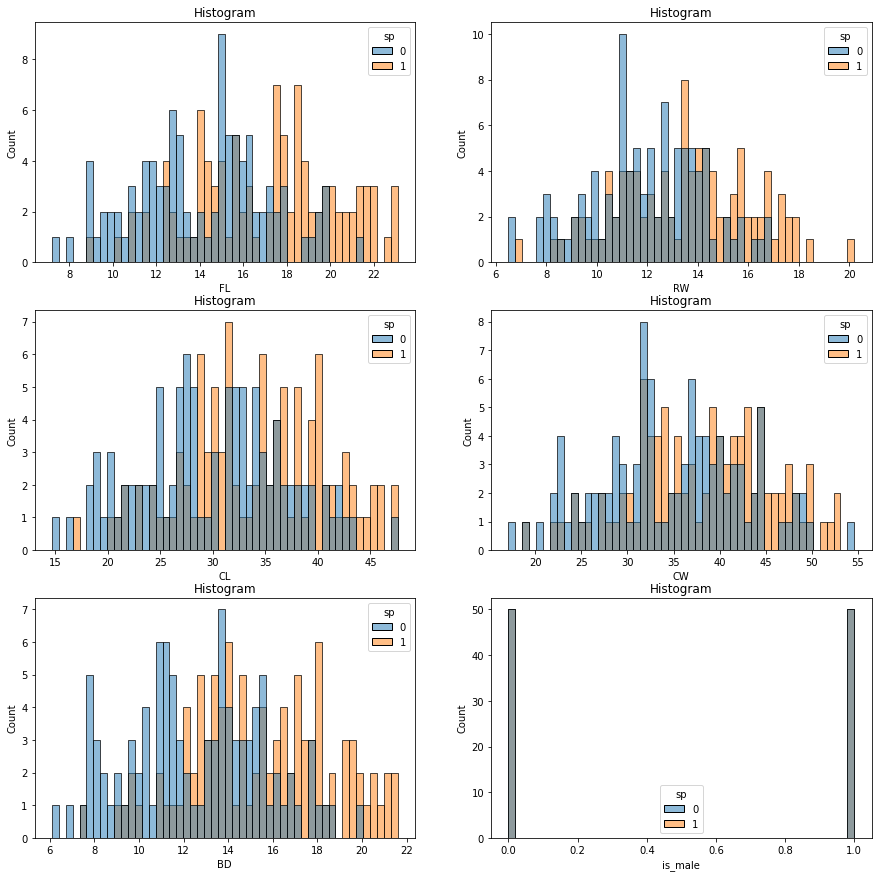

In [259]:
features = X.columns
for i, f in enumerate(features):
    ax = plt.subplot(3, 2, i+1)
    ax.figure.set_size_inches(15, 15)
    sns.histplot(data=X_y, x=f, hue='sp', bins=50);
    plt.title("Histogram");

# 7. Постройте модель машинного обучения, обучите ее на всем датасете.

In [260]:
from sklearn.linear_model import LogisticRegression

In [261]:
clf = LogisticRegression().fit(X, y_int)

In [262]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

# 8. Измерьте эффективность данной модели и сделайте вывод о ее применимости на практике.

In [263]:
clf.score(X, y_int)

1.0

In [300]:
from sklearn.metrics import f1_score

In [301]:
f1_score(y_int, y_pred)

1.0

**Модель делает идельную классификацию на обучающем наборе, возможно переобучние**

# 9. Визуализируйте результаты моделирования, сравните реальные и предсказанные значения.

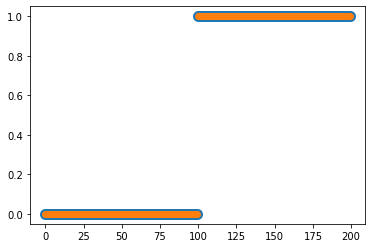

In [266]:
plt.scatter(X.index, y_pred, lw=5)
plt.scatter(X.index, y_int);

# 10. Используйте несколько простых моделей машинного обучения. Сравните их эффективность между собой.

In [267]:
from sklearn.ensemble import RandomForestClassifier

In [268]:
clf_for = RandomForestClassifier(max_depth=5, random_state=0)
clf_for.fit(X, y_int)

RandomForestClassifier(max_depth=5, random_state=0)

In [269]:
y_pred_for = clf_for.predict(X)

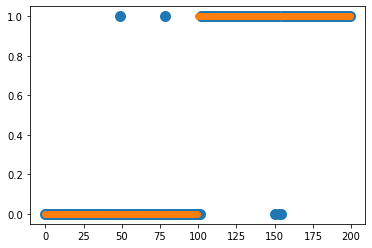

In [270]:
plt.scatter(X.index, y_pred_for, lw=5, label="predicted")
plt.scatter(X.index, y_int, label="True");

In [271]:
clf_for.score(X,y_int)

0.965

In [272]:
f1_score(y_int, y_pred_for)

0.9644670050761421

**Случайный лес сработал хуже на обучающей выборке**

In [273]:
from sklearn.neighbors import KNeighborsClassifier

In [274]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X, y_int)

KNeighborsClassifier(n_neighbors=3)

In [275]:
y_pred_knn = clf_knn.predict(X)

In [276]:
clf_knn.score(X,y_int)

0.98

In [277]:
f1_score(y_int, y_pred_knn)

0.9801980198019802

# Дополнительные задания
### 1. Разбейте датасет на обучающую и тестовую выборки. Обучите модель на первой, а измерьте ее эффективность на второй.

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.3, random_state=42)

In [280]:
X_train.shape

(140, 6)

In [281]:
X_test.shape

(60, 6)

In [294]:
clf1 = LogisticRegression().fit(X_train, y_train)
clf1_score = clf1.score(X_test, y_test)
clf1_score

1.0

In [295]:
clf_for1 = RandomForestClassifier(max_depth=5).fit(X_train, y_train)
clf_for1_score = clf_for1.score(X_test, y_test)
clf_for1_score

0.85

In [296]:
clf_knn1 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
clf_knn1_score = clf_knn1.score(X_test, y_test)
clf_knn1_score

0.9166666666666666

### 2. Примените несколько метрик эффективности для сравнения моделей.

In [305]:
from sklearn.metrics import roc_auc_score

In [318]:
roc_auc_score_score = roc_auc_score(y_test, clf1.predict(X_test))
roc_auc_score_score

1.0

In [319]:
roc_auc_score_score_for1 = roc_auc_score(list(y_test), list(clf_for1.predict(X_test)))
roc_auc_score_score_for1

0.8492769744160178

In [321]:
roc_auc_score_score_knn1 = roc_auc_score(y_test, clf_knn1.predict(X_test))
roc_auc_score_score_knn1

0.9171301446051168

### 3. Выведите сводную таблицу эффективности моделей.

In [322]:
models = ['LogReg', 'Random Forest', 'KNN']
scores = [clf1_score, clf_for1_score, clf_knn1_score]
roc = [roc_auc_score_score, roc_auc_score_score_for1, roc_auc_score_score_knn1]
pd.DataFrame({'Model':models, 'Score':scores, 'roc-auc': roc})

,Model,Score,roc-auc
0,LogReg,1.000000,1.000000
1,Random Forest,0.850000,0.849277
2,KNN,0.916667,0.917130
